In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib  # For loading the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

In [3]:
df = pd.read_csv('cleaned_data.csv')  # Make sure this file contains the 'Date' and 'Close' columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# Load the ARIMA model
model = joblib.load('../model/arima_model.pkl')

In [4]:
# Forecasting for the next 12 months (252 trading days)
forecast_steps = 252
forecast = model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1] + timedelta(days=1), periods=forecast_steps, freq='B')

# Get forecasted mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

/home/g/ALL/10/Wekk11/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/g/ALL/10/Wekk11/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


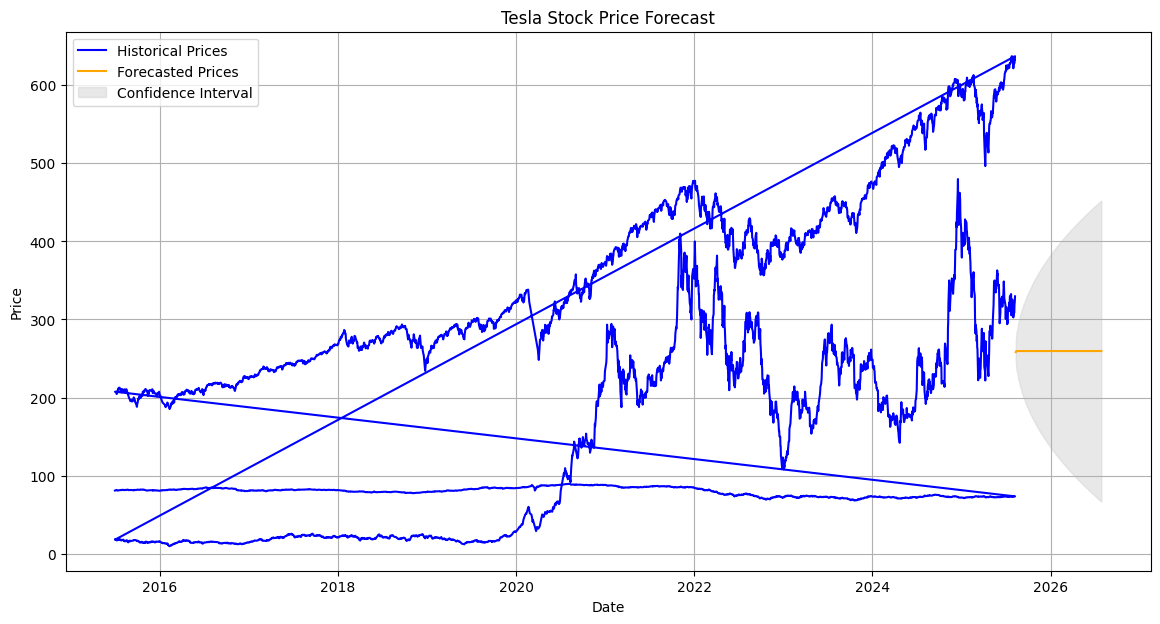

In [5]:
# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Historical Prices', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecasted Prices', color='orange')

# Confidence intervals
plt.fill_between(forecast_index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], 
                 color='lightgrey', alpha=0.5, label='Confidence Interval')

plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [ ]:

# Trend Analysis
trend = "upward" if forecast_mean.iloc[-1] > df['Close'].iloc[-1] else "downward" if forecast_mean.iloc[-1] < df['Close'].iloc[-1] else "stable"
print(f"Trend Analysis: The forecast indicates a {trend} trend.")

# Volatility and Risk Analysis
confidence_interval_width = forecast_conf_int.iloc[:, 1] - forecast_conf_int.iloc[:, 0]
print(f"Width of confidence intervals over the forecast horizon: {confidence_interval_width}")

# Analyze the change in width
width_change_analysis = confidence_interval_width.describe()
print("Confidence Interval Width Analysis:")
print(width_change_analysis)

# Market Opportunities and Riskss
price_increase_opportunity = forecast_mean.iloc[-1] > df['Close'].iloc[-1]
price_decline_risk = confidence_interval_width.iloc[-1] > 100  # Example threshold for volatility risk
print(f"Market Opportunities: Expected price increase: {price_increase_opportunity}")
print(f"Market Risks: High volatility risk: {price_decline_risk}")

Trend Analysis: The forecast indicates a downward trend.
Width of confidence intervals over the forecast horizon: 1936     23.086486
1937     32.135242
1938     39.413333
1939     45.520285
1940     51.296082
           ...    
2183    382.289789
2184    383.061564
2185    383.831786
2186    384.600467
2187    385.367614
Length: 252, dtype: float64
Confidence Interval Width Analysis:
count    252.000000
mean     257.145057
std       91.050273
min       23.086486
25%      193.164376
50%      272.722784
75%      333.830732
max      385.367614
dtype: float64
Market Opportunities: Expected price increase: False
Market Risks: High volatility risk: True
